In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import pearsonr
import requests
from scipy import stats
import seaborn as sns
from config import API_KEY

county_df = pd.read_csv("group-1-project-1/Resources/county_data.csv")
state_df = pd.read_csv("group-1-project-1/Resources/state_data.csv")

In [2]:
#Connecting to Census API for Median Household Income data
url = "https://api.census.gov/data/2021/acs/acs5"
params = {
    "get": "NAME,B19013_001E",  # State name and Median Household Income
    "for": "state:*",            # Get data for all states
    "key": API_KEY       # Your API key
}
response = requests.get(url, params=params)
data = response.json()
median_inc = pd.DataFrame(data)
median_inc = median_inc.drop(0)
median_inc = median_inc.drop(52)
median_inc[1] = pd.to_numeric(median_inc[1], errors='coerce')

In [3]:
county_df = county_df.dropna()

**LINEAR REGRESSION PLOTS**

Please copy the cell below to main - ty!

The r-squared is: 0.40278071357022127


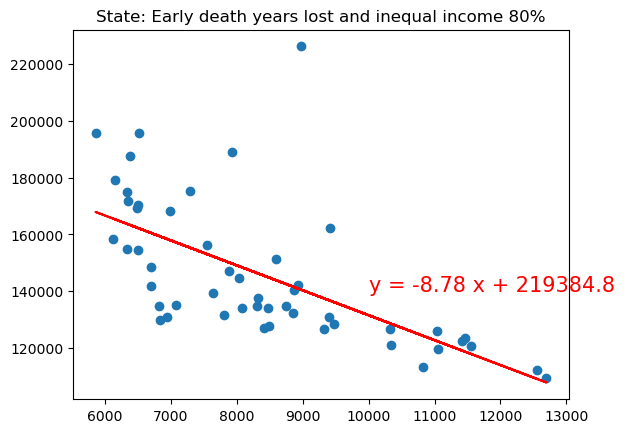

The r-squared is: 0.6371006888391599


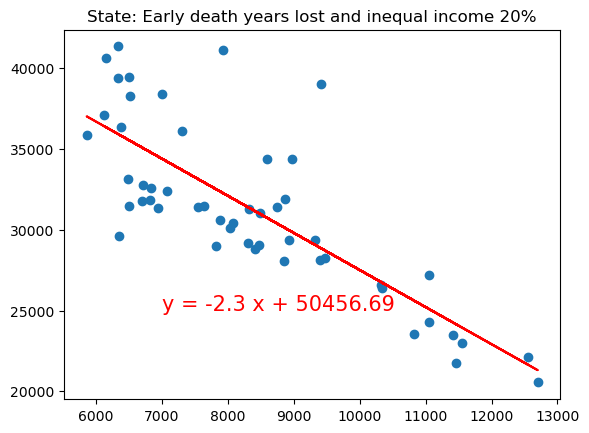

The r-squared is: 0.04981662455258389


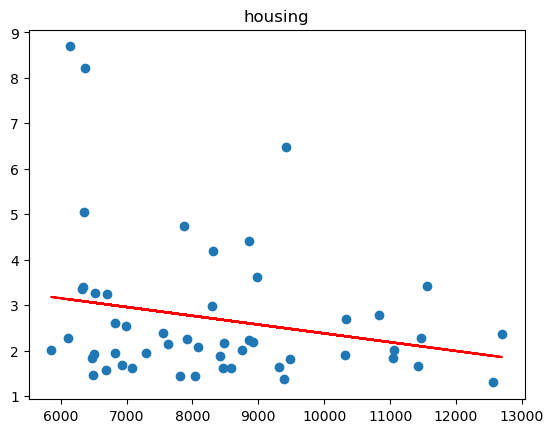

In [6]:
# Define a function to create Linear Regression plots
def plot_linear_regress(x, y, title, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    
# Build scatter plot for early death years and inequal income 80% - CORRELATION IS FAIR SO IT WILL BE USED FOR FURTHER ANALYSIS
x = state_df['early_death_years_lost']
y= state_df['income_inequal_80pct']
title = "State: Early death years lost and inequal income 80%"
text_coordinates = (10000,140000)
plot_linear_regress(x, y, title, text_coordinates)

# Build scatter plot for early death years and inequal income 20% - CORRELATION IS FAIRLY GOOD SO IT WILL BE USED FOR FURTHER ANALYSIS
x = state_df['early_death_years_lost']
y= state_df['income_inequal_20pct']
title = "State: Early death years lost and inequal income 20%"
text_coordinates = (7000,25000)
plot_linear_regress(x, y, title, text_coordinates)

#Checking for housing data in comparison to early death years lost - CORRELATION IS WEAK SO IT WILL NOT BE USED FOR FURTHER ANALYSIS
x = state_df['early_death_years_lost']
y= state_df['housing_overcrowding']
title = "housing"
text_coordinates = (7000,25000)
plot_linear_regress(x, y, title, text_coordinates)

**SHAPIRO-WILK TEST**

In [8]:
#Early Death Years Lost
stat, p_value = stats.shapiro(state_df['early_death_years_lost'])

print('Shapiro-Wilk Test Statistic:', stat)
print('P-value:', p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Early Death Years Lost is normally distributed.")

#Early Death Years Lost
stat, p_value = stats.shapiro(state_df['income_inequal_80pct'])

print('Shapiro-Wilk Test Statistic:', stat)
print('P-value:', p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Income at 80th percentile is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Income at 80th percentile is normally distributed.")

Shapiro-Wilk Test Statistic: 0.9263328976786037
P-value: 0.0036116628297930306
Reject the null hypothesis: Data is not normally distributed.
Shapiro-Wilk Test Statistic: 0.9173977894126759
P-value: 0.001690463460101876
Reject the null hypothesis: Income at 80th percentile is not normally distributed.


**SPEARMAN CORRELATION TEST**

In [10]:
#Spearman correlation testing for income inequal 80%
corr_coefficient, p_value = spearmanr(state_df['early_death_years_lost'], state_df['income_inequal_80pct'])

print('Spearman Correlation Coefficient:', corr_coefficient)
print('P-value:', p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant monotonic relationship exists between early death years lost and income at the 80th percentile.")
else:
    print("Fail to reject the null hypothesis: No significant monotonic relationship between early death years lost and income at the 80th percentile.")

#Spearman correlation testing for income inequal 20%
corr_coefficient, p_value = spearmanr(state_df['early_death_years_lost'], state_df['income_inequal_20pct'])

print('Spearman Correlation Coefficient:', corr_coefficient)
print('P-value:', p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant monotonic relationship exists between early death years lost and income at the 20th percentile.")
else:
    print("Fail to reject the null hypothesis: No significant monotonic relationship between early death years lost and income at the 20th percentile.")

Spearman Correlation Coefficient: -0.7570307022458402
P-value: 1.2956288418817847e-10
Reject the null hypothesis: Significant monotonic relationship exists between early death years lost and income at the 80th percentile.
Spearman Correlation Coefficient: -0.7743891402714933
P-value: 2.6252318611349003e-11
Reject the null hypothesis: Significant monotonic relationship exists between early death years lost and income at the 20th percentile.


**PULLING IN CENSUS API FOR MEDIAN HOUSEHOLD INCOME**

The r-squared is: 0.5536843632844494


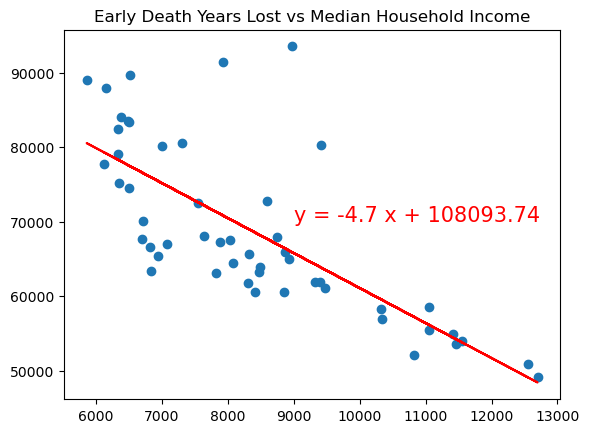

In [12]:
#Checking against median hosuehold income
x = state_df['early_death_years_lost']
y = median_inc[1]
title = "Early Death Years Lost vs Median Household Income"
text_coordinates = (9000,70000)
plot_linear_regress(x, y, title, text_coordinates)

In [14]:
# Define a function to create Linear Regression plots - States
def cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel):
    # Set parameters
    x = x_values  
    y = y_values
    
    # Get all the needed data
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    print(f"The r² value is {round(r**2, 3)}")

    # Plot data points
    plt.scatter(x, y, label='State Data')

    # Apply our model
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='orange', label='Regression line')

    # Set labels
    plt.title(f"{cool_xlabel} vs {cool_ylabel}")
    plt.xlabel(cool_xlabel)
    plt.ylabel(cool_ylabel)

    # Add the equation used for the regression line
    equation_text = f"y = {round(slope, 4)}x + {round(intercept, 2)}"
    plt.text(x.min(), y.max(), equation_text, fontsize=12, color='red')

    plt.show()

#Define a Function to determine if the x and y values are normally distributed to determine which hypothesis testing model to move forward with
def correlation_function_state(x_values, y_values):
    # Perform the Shapiro-Wilk test for normality
    stat_x, p_value_x = shapiro(x_values)
    stat_y, p_value_y = shapiro(y_values)

    # Check if both x and y are normally distributed
    if p_value_x > 0.05 and p_value_y > 0.05:
        # Use Pearson correlation
        correlation, p_value = pearsonr(x_values, y_values)
        correlation_type = "Pearson"
    else:
        # Use Spearman correlation
        correlation, p_value = spearmanr(x_values, y_values)
        correlation_type = "Spearman"
     
       
    # Return results
    return correlation, p_value, correlation_type

In [24]:
state_df.columns

Index(['fips', 'state', 'county', 'adult_obesity_pct', 'adult_obesity_z',
       'food_environment_index', 'food_environment_index_z',
       'exercise_access_pct', 'exercise_access_z', 'excess_drinking_pct',
       'excess_drinking_z', 'uninsured_num', 'uninsured_pct', 'uninsured_z',
       'primary_care_phys_rate', 'primary_care_phys_z',
       'prevent_hospital_rate', 'prevent_hospital_z', 'income_inequal_80pct',
       'income_inequal_20pct', 'income_inequal_ratio', 'income_inequal_z',
       'early_death_count', 'early_death_years_lost', 'mental_health_ratio',
       'mental_health_rate', 'mental_health_num', 'housing_z',
       'unemployment_z', 'physical_inactive_z', 'smoking_z', 'dentists_z',
       'mental_health_z', 'poor_health_z', 'poor_phys_health_z',
       'poor_mental_health_z', 'dentists_ratio', 'dentists_num',
       'dentists_rate', 'exercise_access_pct.1', 'unemployment_num',
       'unemployment_pct', 'poor_physical_health_avg_days',
       'housing_inad_facil', 'h

The r² value is 0.505


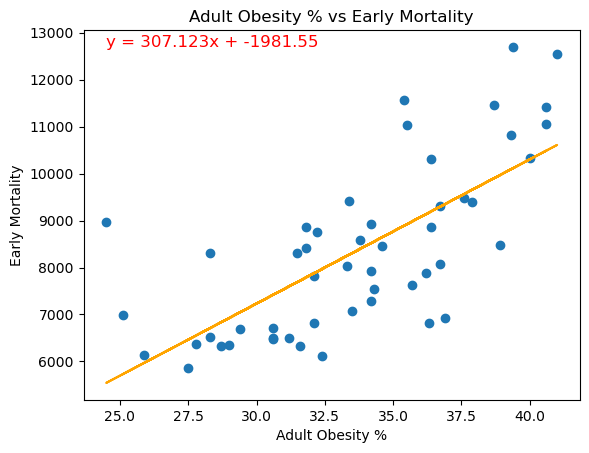

Spearman correlation: 0.7132, p-value: 4.301e-09
The correlation is statistically significant and the correlation strength is strong.


In [38]:
# Set x and y values and labels

x_values = state_df["adult_obesity_pct"]
y_values = state_df["early_death_years_lost"]
cool_ylabel = "Early Mortality"
cool_xlabel = "Adult Obesity %"

# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

In [40]:
#Filter state dataframe by selecting the columns that only have correlation
new_state_df = state_df[['state','early_death_years_lost','income_inequal_20pct', 
                         'income_inequal_80pct', 'poor_physical_health_avg_days', 
                         'food_environment_index', 'exercise_access_pct', 'adult_obesity_pct']]

#Determine the top 10 states that have the highest early death years lost (least favorable)
sorted = new_state_df.sort_values(by='early_death_years_lost', ascending=False)
high_10 = sorted.head(10)

sorted2 = new_state_df.sort_values(by='early_death_years_lost')
low_10 = sorted2.head(10)

In [42]:
#Filter state dataframe by selecting the columns that only have correlation
new_state_df = state_df[['state','early_death_years_lost','income_inequal_20pct', 
                         'income_inequal_80pct', 'poor_physical_health_avg_days', 
                         'food_environment_index', 'exercise_access_pct', 'adult_obesity_pct']]

#Determine the top 10 states that have the highest early death years lost (least favorable)
sorted = new_state_df.sort_values(by='early_death_years_lost', ascending=False)
high_10 = sorted.head(10)

sorted2 = new_state_df.sort_values(by='early_death_years_lost')
low_10 = sorted2.head(10)

variables = [
    'income_inequal_20pct',
    'income_inequal_80pct',
    'poor_physical_health_avg_days',
    'food_environment_index',
    'exercise_access_pct',
    'adult_obesity_pct'
]

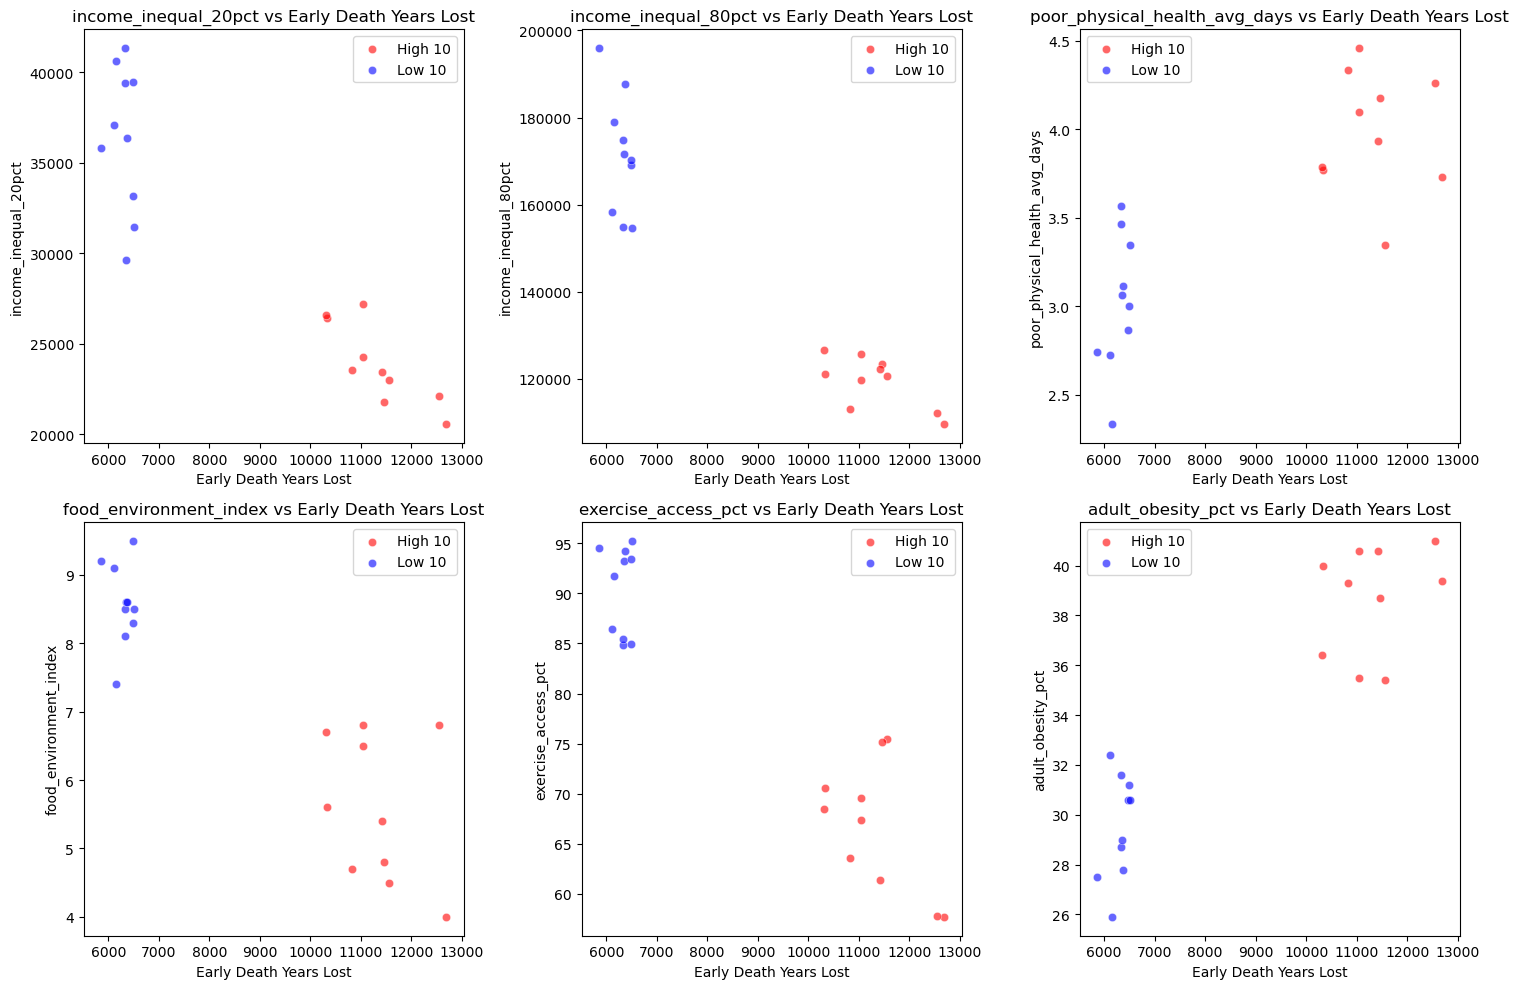

In [44]:
# Create scatter plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=high_10, x='early_death_years_lost', y=var, color='red', label='High 10', alpha=0.6)
    sns.scatterplot(data=low_10, x='early_death_years_lost', y=var, color='blue', label='Low 10', alpha=0.6)
    
    plt.title(f'{var} vs Early Death Years Lost')
    plt.xlabel('Early Death Years Lost')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

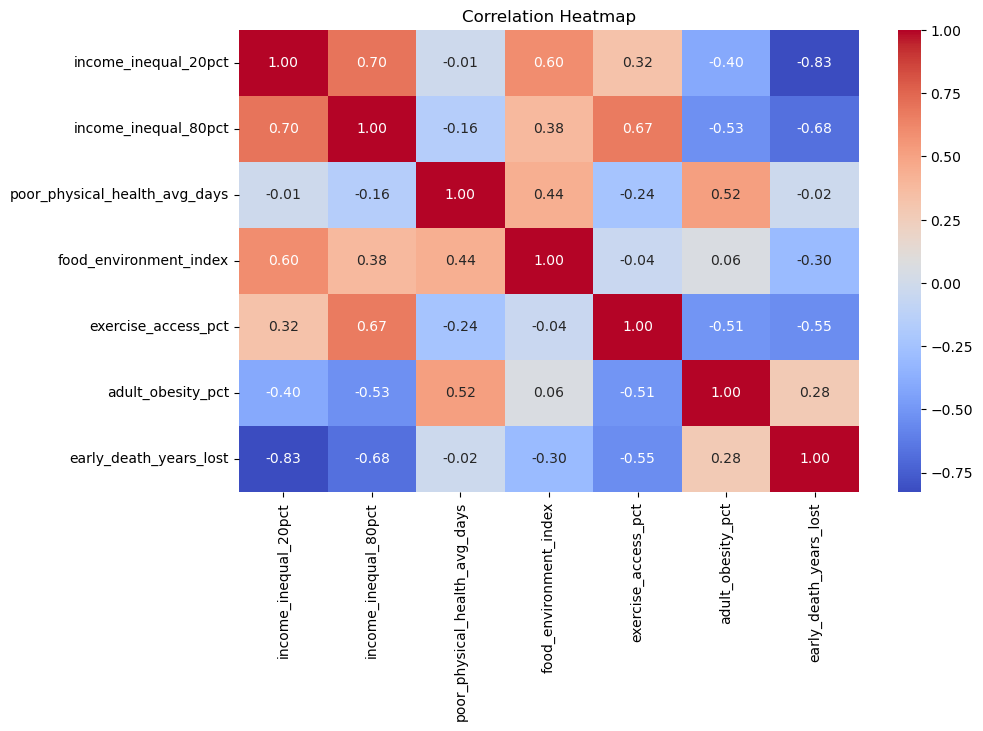

In [45]:
# Compute the correlation matrix
correlation_matrix = high_10[variables + ['early_death_years_lost']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

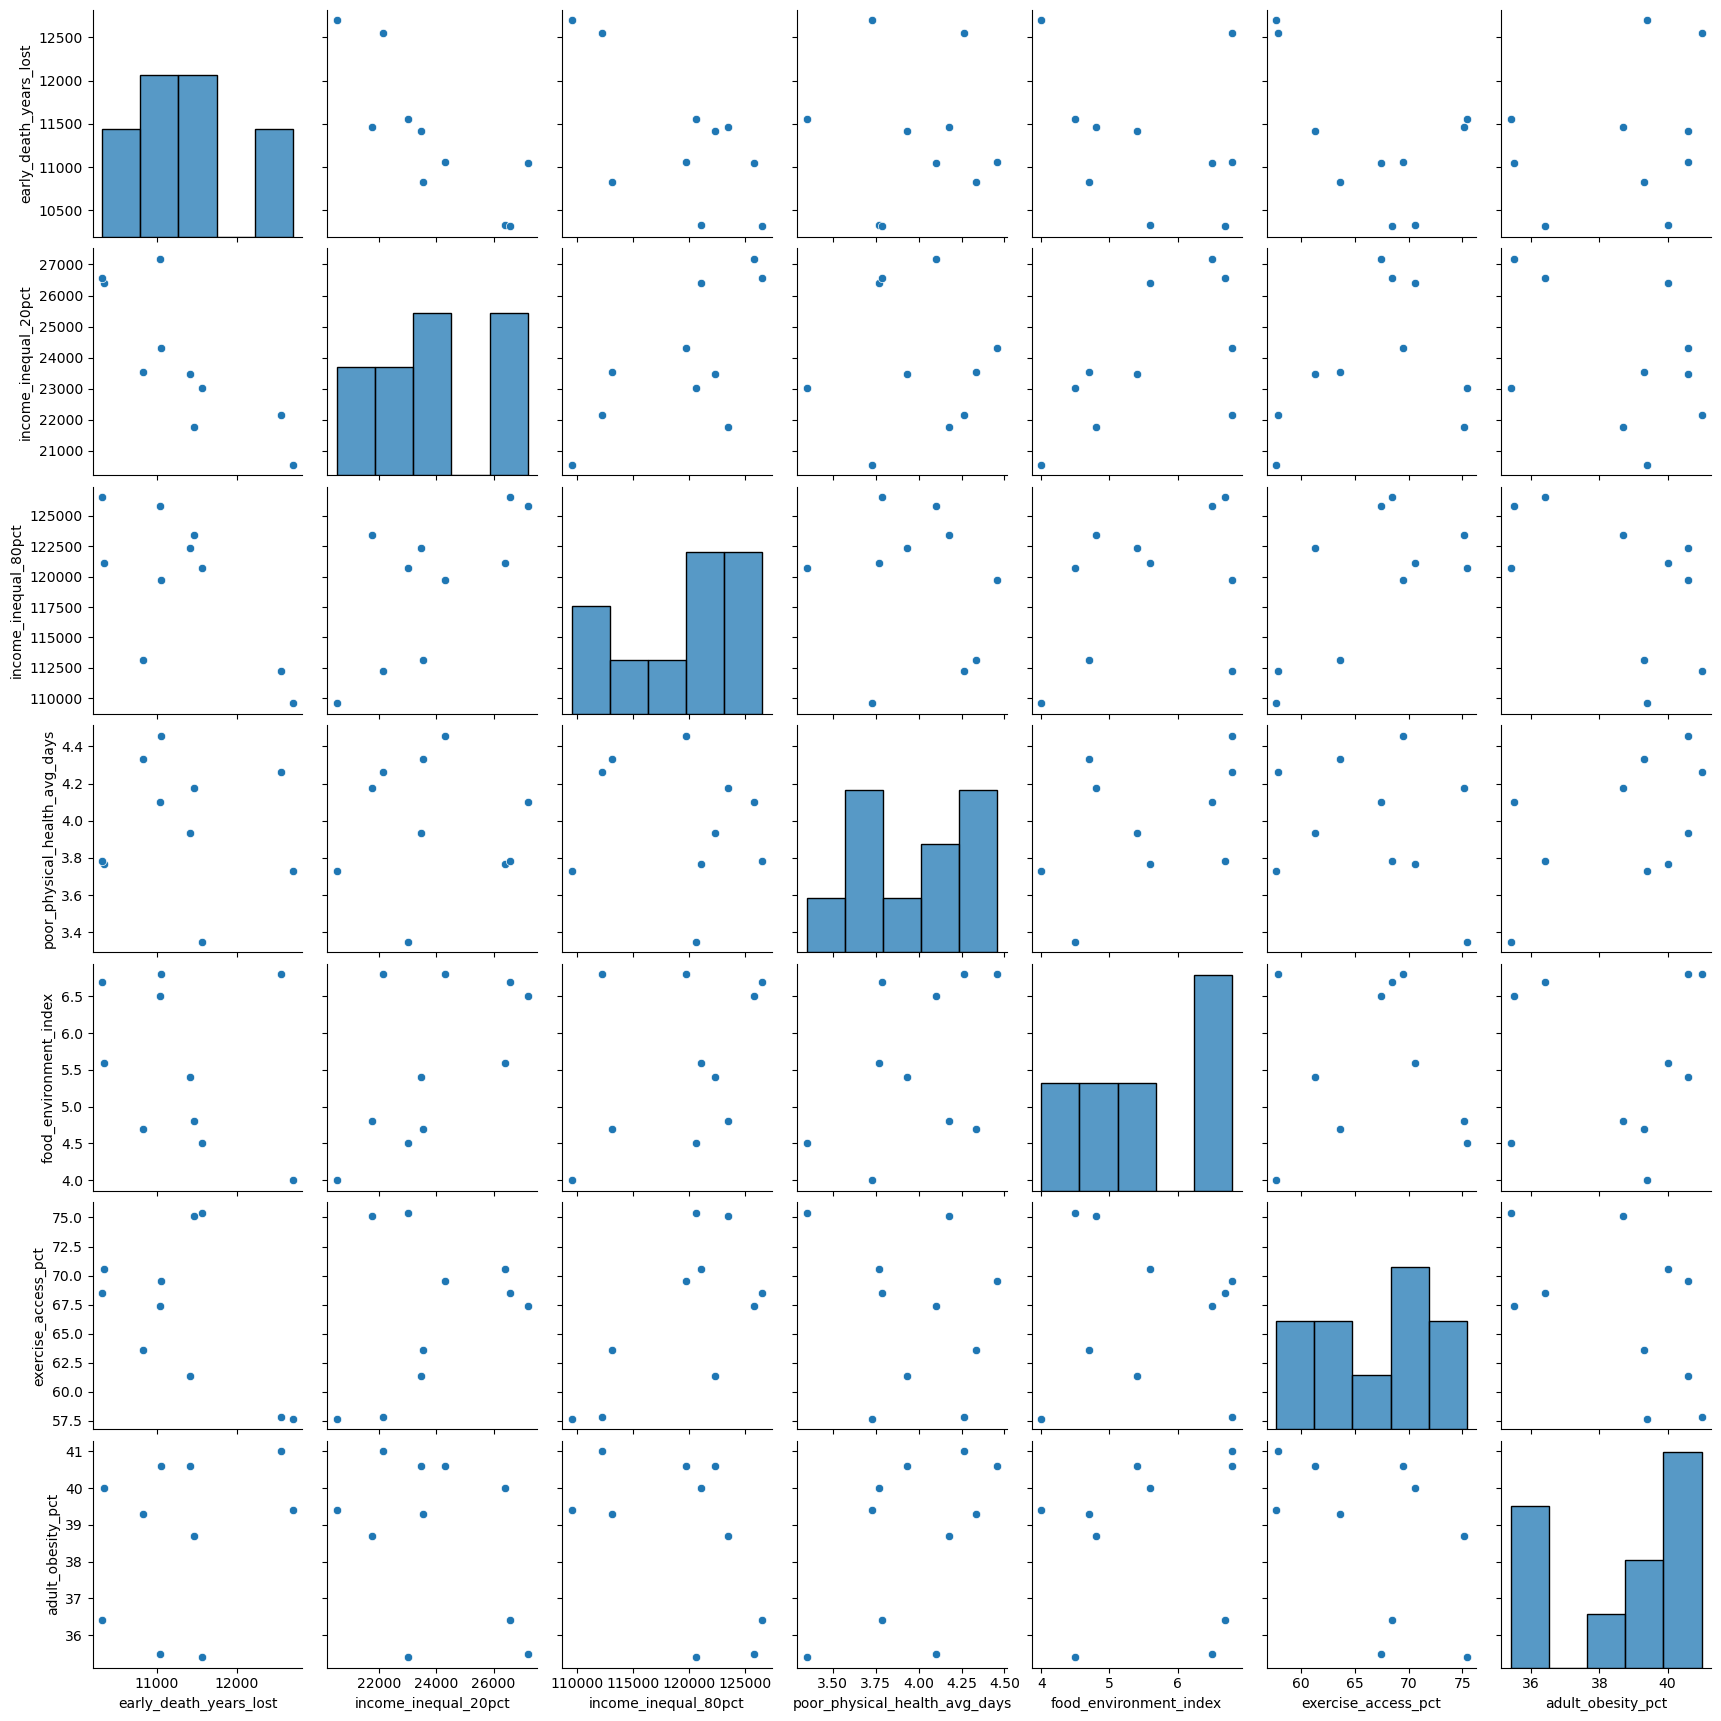

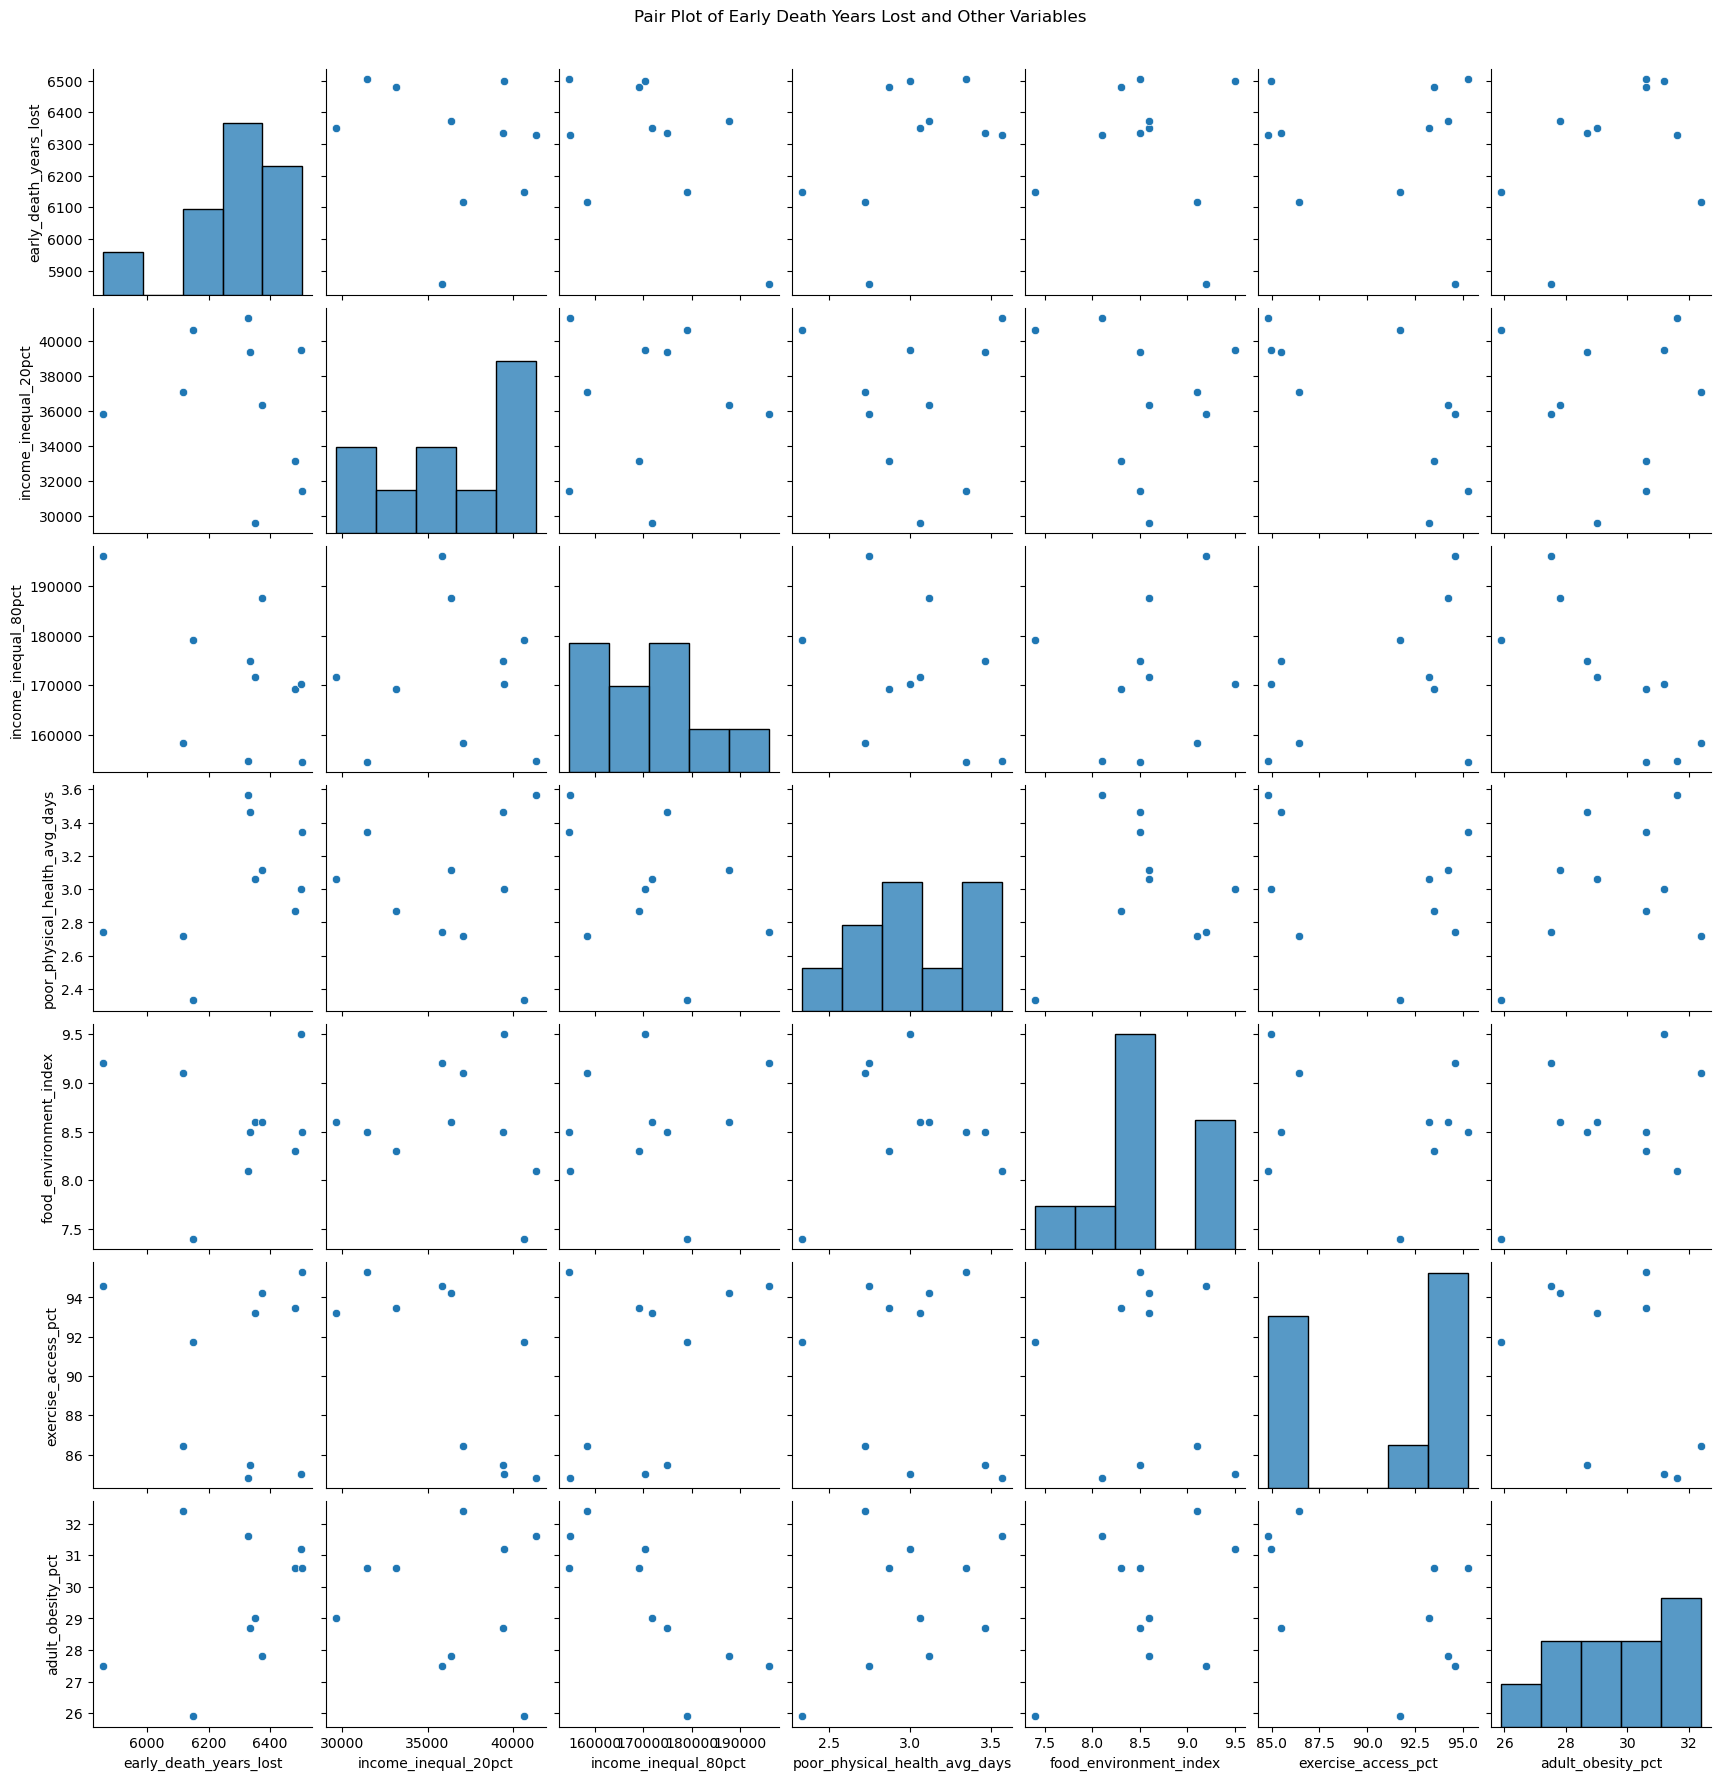

In [48]:
# Creating a pair plot
sns.pairplot(high_10, vars=['early_death_years_lost'] + variables)
sns.pairplot(low_10, vars=['early_death_years_lost'] + variables)
plt.suptitle('Pair Plot of Early Death Years Lost and Other Variables', y=1.02)
plt.show()

In [50]:
median_inc = median_inc.rename(columns={median_inc.columns[0]: 'state'})
median_inc = median_inc.rename(columns={median_inc.columns[1]: 'median household income'})
median_inc = median_inc.iloc[:, :2]
combined_df = pd.merge(new_state_df, median_inc, on='state', how='inner')
combined_df.columns

Index(['state', 'early_death_years_lost', 'income_inequal_20pct',
       'income_inequal_80pct', 'poor_physical_health_avg_days',
       'food_environment_index', 'exercise_access_pct', 'adult_obesity_pct',
       'median household income'],
      dtype='object')

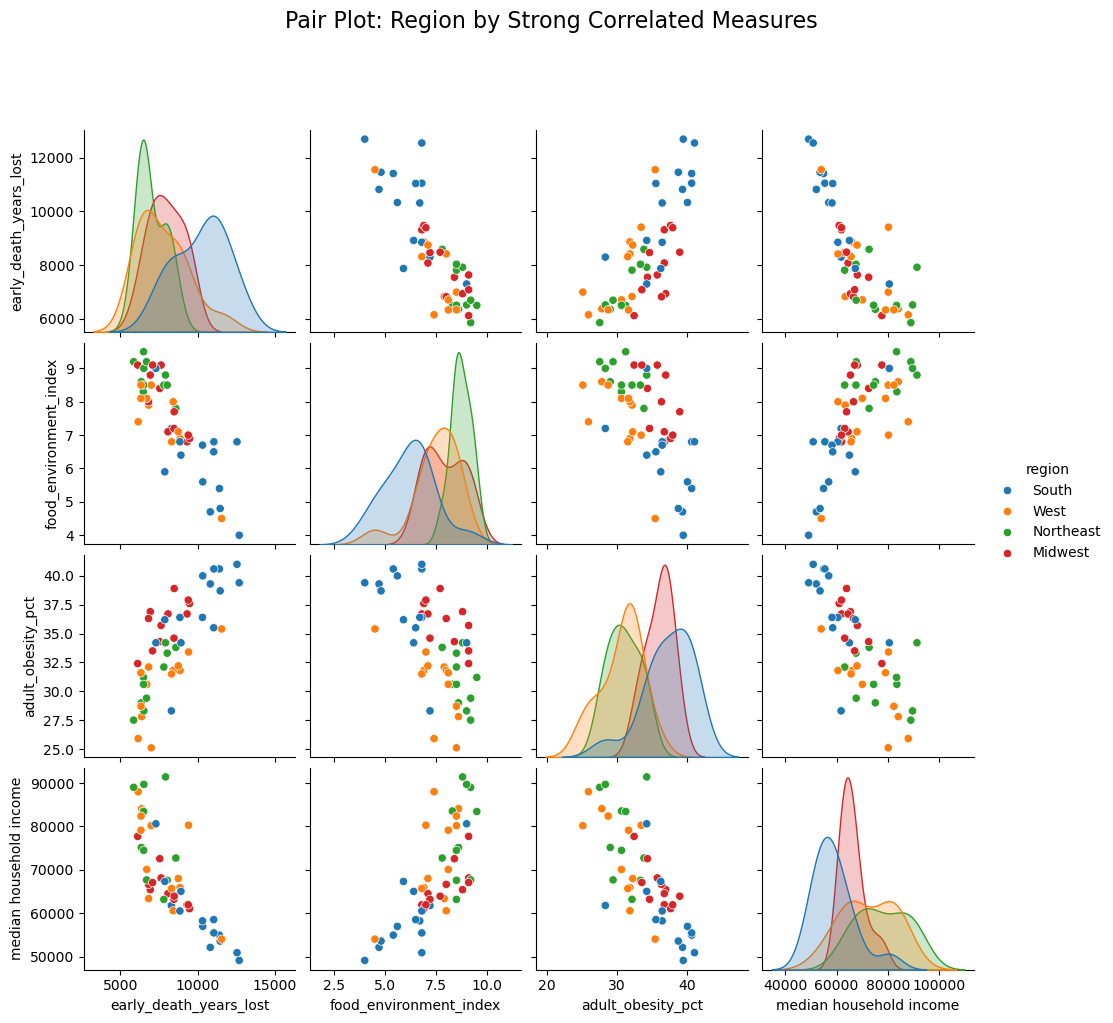

In [51]:
#Adding region to df
region_mapping = {'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South', 'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Northeast', 'Florida': 'South', 'Georgia': 'South', 'Hawaii': 'West', 'Idaho': 'West', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Kentucky': 'South', 'Louisiana': 'South', 'Maine': 'Northeast', 'Maryland': 'Northeast', 'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'South', 'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest', 'Nevada': 'West', 'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New Mexico': 'West', 'New York': 'Northeast', 'North Carolina': 'South', 'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'Oklahoma': 'South', 'Oregon': 'West', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'South Carolina': 'South', 'South Dakota': 'Midwest', 'Tennessee': 'South', 'Texas': 'South', 'Utah': 'West', 'Vermont': 'Northeast', 'Virginia': 'South', 'Washington': 'West', 'West Virginia': 'South', 'Wisconsin': 'Midwest', 'Wyoming': 'West'}

# Add a new column for the region
combined_df['region'] = combined_df['state'].map(region_mapping)


# Drop rows with NaN values in relevant columns
region_df = combined_df.dropna(subset=['early_death_years_lost', 
                                          'food_environment_index', 
                                          'adult_obesity_pct', 
                                          'median household income'])

# Sort by region
region_df = region_df.sort_values(by='region')

# Create pair plot
sns.pairplot(combined_df, hue='region', vars=['early_death_years_lost',
                                                'food_environment_index',
                                                'adult_obesity_pct',
                                                'median household income'])

plt.suptitle('Pair Plot: Region by Strong Correlated Measures', y=1.02, fontsize=16)
plt.subplots_adjust(top=0.9) 
plt.show()

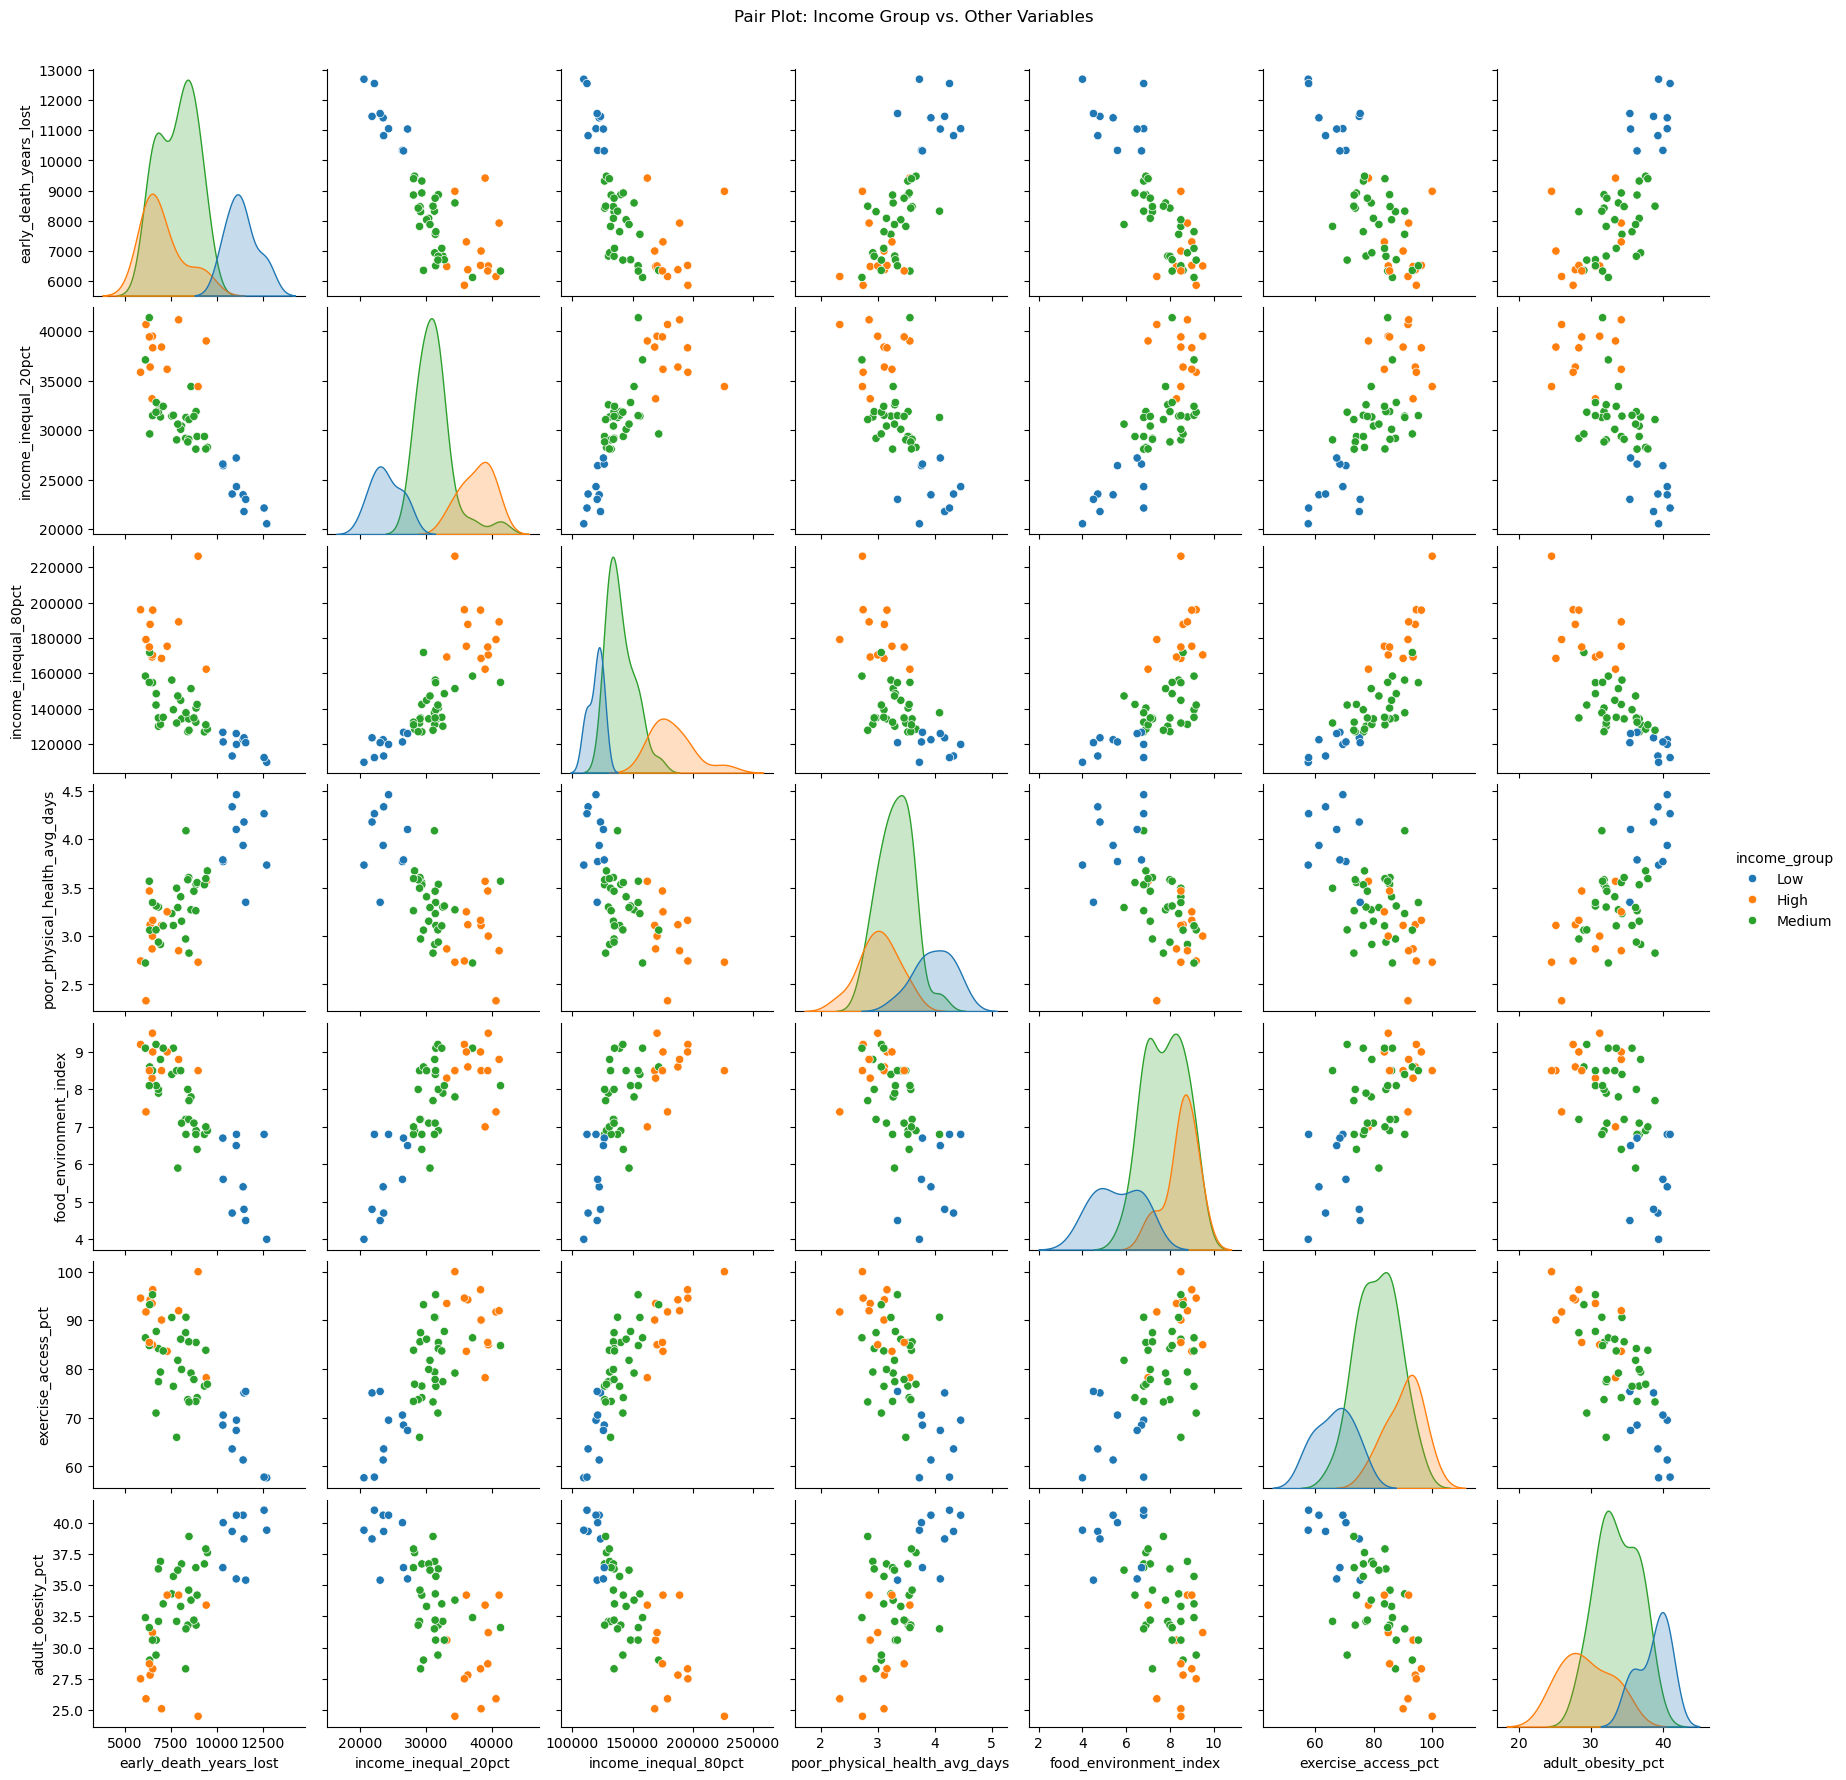

In [52]:
#sort data by median household income and see if that shows any interesting data in the pair plot
def categorize_income(income):
    if income < 60000:
        return 'Low'
    elif 60000 <= income <= 80000:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
combined_df['income_group'] = combined_df['median household income'].apply(categorize_income)

sns.pairplot(combined_df, hue='income_group', vars=['early_death_years_lost', 'income_inequal_20pct',
    'income_inequal_80pct',
    'poor_physical_health_avg_days',
    'food_environment_index',
    'exercise_access_pct',
    'adult_obesity_pct'])

plt.suptitle('Pair Plot: Income Group vs. Other Variables', y=1.02)
plt.show()

The r² value is 0.554


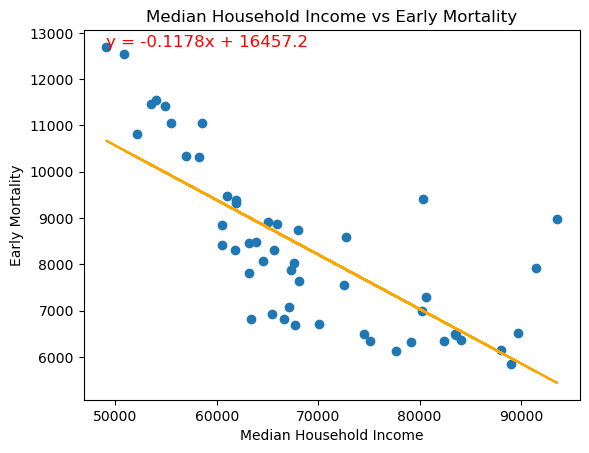

Spearman correlation: -0.7728, p-value: 3.068e-11
The correlation is statistically significant and the correlation strength is strong.


In [56]:
# Set x and y values and labels

x_values = combined_df['median household income']
y_values = combined_df["early_death_years_lost"]
cool_ylabel = "Early Mortality"
cool_xlabel = "Median Household Income"

# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

In [68]:
sorted_combined_df = combined_df.sort_values(by='median household income', ascending=False)

# Display the sorted DataFrame
print(sorted_combined_df)

                   state  early_death_years_lost  income_inequal_20pct  \
8   District of Columbia             8975.956019               34391.0   
20              Maryland             7921.431604               41125.0   
30            New Jersey             6516.293727               38299.0   
21         Massachusetts             5856.410045               35834.0   
11                Hawaii             6148.110563               40649.0   
4             California             6373.194549               36359.0   
6            Connecticut             6480.380156               33156.0   
29         New Hampshire             6498.831465               39470.0   
47            Washington             6333.473978               39399.0   
46              Virginia             7297.069384               36133.0   
1                 Alaska             9414.775658               38990.0   
5               Colorado             6993.794037               38376.0   
44                  Utah             6

Health Outcomes across the US: Exploring Socioeconomic Factors, Lifestyle, and Environmental Conditions Behind premature deaths in the U.S.

How do socioeconomic factors, lifestyle, and environmental conditions contribute to the prevalence of preventable hospital stays across different demographic groups in the U.S.?
The impact of income, education, and employment on health outcomes.
The role of obesity, excessive drinking, and physical inactivity in preventable hospitalizations.
The influence of environmental factors like air pollution.
How these relationships vary by demographic factors (e.g., race, age).

**POTENTIAL QUESTIONS**

- How does median household income relate to early death years lost in different regions?
- How do lifestyle choices like excess drinking and smoking correlate with early death years lost?
- How does poor physical health and poor mental health relate to early death years lost?
